In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
rng = np.random.default_rng()

# **Data Generation & Weights Initialization**

In [ ]:
n = 100
X = rng.uniform(1, 10, size = n).reshape((-1, 1))
y = X + rng.normal(0, 2, n).reshape((-1, 1))
X = np.hstack((np.ones(shape = (X.shape[0], 1)), X)) # Add an intercept column to X
#p = rng.permutation(len(X)) # Shuffle X, and y in unison
#X, y = X[p], y[p]
w = rng.uniform(low = -0.1, high = 0.1, size = X.shape[1]).reshape((-1, 1)) # Initialize weights randomly [0, 1)
w_old = w.copy()
print('X:', X.shape, 'y',  y.shape, 'w:', w.shape) # Sanity check

X: (100, 2) y (100, 1) w: (2, 1)


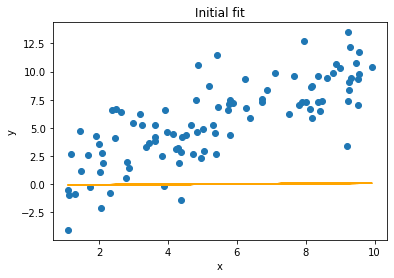

Initial weights: [-0.09927662] [0.01827655]


In [ ]:
ys = X@w
plt.xlabel('x'), plt.ylabel('y'), plt.title('Initial fit')
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], ys, 'orange')
plt.show()
print('Initial weights:', *w)

# **Gradient Descent (or Full "Batch" GD)**

In [ ]:
# Learning rate
eta = 0.0001
loss_history = []
w_history = None
w_history = w.copy()
converged = False
epoch = 1
previous_loss = 0

while (not converged) and epoch < 1000:            
    y_hat = X@w
    dist = y_hat - y # Nx1
    avg_L = np.mean(dist**2) # Nx1
    # dist : Nx1
    # X : NxD
    avg_dL = 2*np.mean(X.T@dist, axis = 1)
    loss_history.append(avg_L)  

    # Update the weights
    w -= (eta*avg_dL).reshape((w.shape[0], -1))
    w_history = np.hstack((w_history, w))

    delta = np.abs(previous_loss - avg_L)
    previous_loss = delta
    print(f'Epoch: {epoch} - MSE: {np.around(np.mean(loss_history), decimals=3)}, Delta: {delta}')

    if delta < 1: 
        print(f'Converged at Epoch {epoch}.')
        converged = True
        break

    epoch += 1

w_history = w_history[:, 1:].T

Epoch: 1 - MSE: 43.715, Delta: 43.7153171752151
Epoch: 2 - MSE: 25.744, Delta: 35.9432724161942
Epoch: 3 - MSE: 18.938, Delta: 30.61622714514418
Epoch: 4 - MSE: 15.494, Delta: 25.45551930120734
Epoch: 5 - MSE: 13.425, Delta: 20.30614669449479
Epoch: 6 - MSE: 12.046, Delta: 15.157565414921349
Epoch: 7 - MSE: 11.06, Delta: 10.009058077457295
Epoch: 8 - MSE: 10.321, Delta: 4.860575730560536
Epoch: 9 - MSE: 9.747, Delta: 0.28788510712378645
Converged at Epoch 9.


# **Initial Weights vs Optimized Weights**

In [ ]:
print('Initial weights:', *w_old)
print('Updated weights:', *w)

Initial weights: [-0.09927662] [0.01827655]
Updated weights: [0.04817091] [1.02909502]


# **Visualizations**

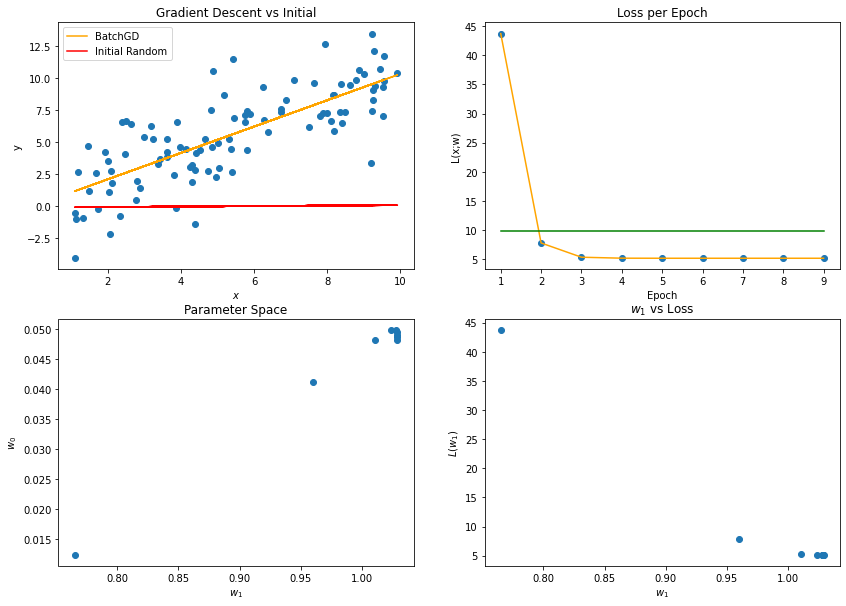

In [ ]:
figure, axis = plt.subplots(2, 2, figsize=(14,10))

# Calculate the y values for the new weights verus the old weights.
y_curr, y_init = X@w, X@w_old
#axis[0].xlabel('x'), axis[0].ylabel('y')
axis[0,0].set_title('Gradient Descent vs Initial')
axis[0,0].scatter(X[:, 1], y)
sgd_line, random_line = axis[0,0].plot(X[:, 1], y_curr, 'orange', label = 'BatchGD'), axis[0,0].plot(X[:, 1], y_init, 'red', label = 'Initial Random')
axis[0,0].set(xlabel=r"$x$", ylabel=r"y")
axis[0,0].legend(loc = 'best')


#axis[1].xlabel('Iter'), axis[1].ylabel('L(w)')
axis[0,1].set_title('Loss per Epoch')
axis[0,1].scatter(np.arange(len(loss_history)) + 1, loss_history)
axis[0,1].plot(np.arange(len(loss_history)) + 1, loss_history, 'orange')
axis[0,1].plot(np.arange(len(loss_history)) + 1, np.mean(loss_history)*np.ones(len(loss_history)), 'green')
axis[0,1].set(xlabel="Epoch", ylabel=r"L(x;w)")

# TODO: Color code the parameter data by given their epoch
axis[1,0].set_title('Parameter Space')
axis[1,0].scatter(w_history[:, 1], w_history[:, 0])
axis[1,0].set(xlabel=r"$w_1$", ylabel=r"$w_0$")

#axis[2].xlabel(r'$w_1$'), axis[2].ylabel('L(w)')
axis[1,1].set_title(r'$w_1$ vs Loss')
axis[1,1].scatter(w_history[:, 1], loss_history)
#axis[1,1].plot(w_history[:, 1], loss_history)
axis[1,1].set(xlabel=r"$w_1$", ylabel=r"$L(w_1)$")
plt.show()